# Part 1: Data Preprocessing and Model Comparison (Linear Regression & Batch GD)

In this section, we:
- Extract the California Housing dataset from `sklearn.datasets`.
- Split the data into training (80%) and test (20%) sets.
- Apply two preprocessing methods: **MinMaxScaler** and **StandardScaler**.
- Fit the data using:
  - **Linear Regression** (closed-form solution).
  - **Batch Gradient Descent (BGD)**.
- For BGD, we visualize:
  - The effect of varying the **learning rate** with a fixed number of epochs.
  - The effect of varying the **number of epochs** with a fixed learning rate.
  - In addition to these separate effects, we also plotted a **Response Surface** plot and generate a **contour heatmap** to examine the joint influence of both hyperparameters (learning rate and epochs) on the test error.

*Note: The goal here is not exhaustive hyperparameter tuning, but to explore how scaling and basic parameter choices influence model performance.*

**Extracting the California housing price dataset from the sklearn library**

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x,y = housing.data, housing.target.reshape(-1,1) # reshape(-1,1) -> converts (z ,) to (z ,1)
print(x.shape)
print(y.shape)

(20640, 8)
(20640, 1)


**Converting features and target to DataFrames and display the first rows**

In [3]:
import pandas as pd
x_df = pd.DataFrame(x, columns=housing.feature_names)
y_df = pd.DataFrame(y, columns=["MedHouseVal"])
display(x_df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


**Checking for missing values**<br>*Although datasets from Python libraries are usually pre-cleaned, it's good practice to verify.*

In [4]:
display(x_df.isnull().sum())
display(y_df.isnull().sum())

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0


,0
MedHouseVal,0


**ُSplitting the dataset: 80% for training, 20% held out for testing**

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)
print(x_train.shape)

(16512, 8)


**Preprocessing: MinMax scaler**

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_MinMax = scaler.fit_transform(x_train)
x_test_MinMax = scaler.transform(x_test)

print(x_test_MinMax[0, :]) # displaying the first row

[0.32954028 0.21568627 0.02566135 0.01918723 0.01126713 0.00540837
 0.17215728 0.51494024]


**Preprocessing: Standard scaler**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_Standard = scaler.fit_transform(x_train)
x_test_Standard = scaler.transform(x_test)

print(x_test_Standard[0]) # displaying the first row

[ 0.74816519 -1.31572939 -0.37191053 -0.23476418 -0.89858886  0.14088876
 -0.69176618  0.19764496]


**Linear Regression with MinMaxScaler preprocessing**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model1 = LinearRegression()
model1.fit(x_train_MinMax, y_train)
y_pred1 = model1.predict(x_test_MinMax)
mse1 = mean_squared_error(y_test, y_pred1) # MSE of test data based on the model fitted on train data

print(mse1)

0.5444842122132871


**Linear Regression with StandardScaler preprocessing**

In [9]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(x_train_Standard, y_train)
y_pred2 = model2.predict(x_test_Standard)
mse2 = mean_squared_error(y_test, y_pred2) # MSE of test data based on the model fitted on train data

print(mse2)

0.5444842122132871


**Batch Gradient Descend with MinMaxScaler preprocessing**

In [10]:
import numpy as np

# Build X matrice with bias term (first column is one because of w0)
X = np.hstack([np.ones((x_train_MinMax.shape[0], 1)), x_train_MinMax])

def h_w(X, w):
    return X.dot(w)   # returns the y hat value for every x

epochs = 400
alpha = 0.1
w = np.zeros((X.shape[1], 1))  # initial weights [w0,w1,...,w8]

for i in range(epochs):
    # This is Batch GD, because X is consist of all the train data and the calculation repeats in each epoch
    error = h_w(X, w) - y_train
    grad = (X.T.dot(error)) / len(y_train)
    w -= alpha * grad   # update all weights at once(Batch GD)

print("Final weights:\n", w.T)
y_pred3 = h_w(np.hstack([np.ones((x_test_MinMax.shape[0], 1)), x_test_MinMax]), w) # bias term
mse3 = mean_squared_error(y_test, y_pred3)
print("\nMean Squared Error:\n",mse3)

Final weights:
 [[ 1.18071308  3.194227    0.66289636  0.12433196  0.01353302  0.05618713
  -0.01278457 -0.44205458 -0.16234713]]

Mean Squared Error:
 0.8085778246584452


**Batch Gradient Descend with StandardScaler preprocessing**

In [11]:
X = np.hstack([np.ones((x_train_Standard.shape[0], 1)), x_train_Standard])

epochs = 400
alpha = 0.1
w = np.zeros((X.shape[1], 1))  # initial weights [w0,w1,...,w8]

for i in range(epochs):
    error = h_w(X, w) - y_train
    grad = (X.T.dot(error)) / len(y_train)
    w -= alpha * grad

print("Final weights:\n", w.T)
y_pred4 = h_w(np.hstack([np.ones((x_test_Standard.shape[0], 1)), x_test_Standard]), w)
mse4 = mean_squared_error(y_test, y_pred4)
print("\nMean Squared Error:\n",mse4)

Final weights:
 [[ 2.06456048e+00  8.30898417e-01  1.25678272e-01 -2.72822327e-01
   3.14202574e-01 -2.06905760e-04 -3.16675434e-02 -8.49440384e-01
  -8.18285072e-01]]

Mean Squared Error:
 0.5440605738609553


**Ploting error vs epoch at constant alpha**<br>*for the learning rate of 0.1 mean-squared error of train and test data vs epochs are plotted based on the standard preprocessing*

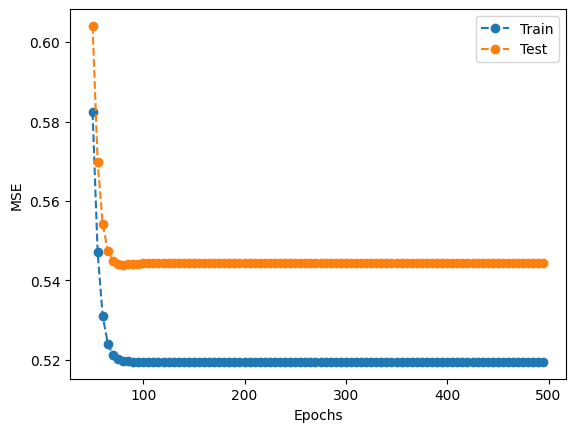

In [12]:
import matplotlib.pyplot as plt

X = np.hstack([np.ones((x_train_Standard.shape[0], 1)), x_train_Standard])
alpha = 0.1
w = np.zeros((X.shape[1], 1))
mse_train = []
mse_test = []
range_epochs = range(50,500,5)

for epochs in range_epochs:
  for i in range(epochs):
    error = h_w(X, w) - y_train
    grad = (X.T.dot(error)) / len(y_train)
    w -= alpha * grad

  y_pred_train = h_w(np.hstack([np.ones((x_train_Standard.shape[0], 1)), x_train_Standard]), w)
  y_pred_test = h_w(np.hstack([np.ones((x_test_Standard.shape[0], 1)), x_test_Standard]), w)
  mse5 = mean_squared_error(y_train, y_pred_train)
  mse6 = mean_squared_error(y_test, y_pred_test)
  mse_train.append(mse5)
  mse_test.append(mse6)


plt.plot(range_epochs, mse_train,'o--' ,label="Train")
plt.plot(range_epochs, mse_test, 'o--', label="Test")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

MSE_train_ep = np.array(mse_train).reshape(-1,1)
MSE_test_ep = np.array(mse_test).reshape(-1,1)

**Plotting error vs alpha at constant epoch**<br>*for epochs of 400 mean-squared error of train and test data vs alpha are plotted based on the standard preprocessing*

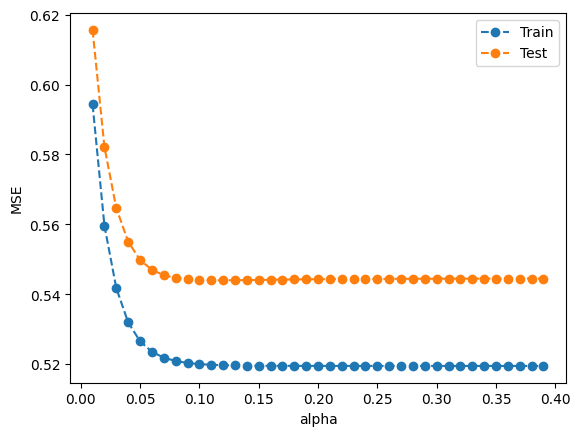

In [13]:
X = np.hstack([np.ones((x_train_Standard.shape[0], 1)), x_train_Standard])
epochs = 400
mse_train = []
mse_test = []

# Create a list of alpha values
alpha_values = [round(i, 4) for i in np.arange(0.01, 0.4, 0.01)]

for alpha in alpha_values:
  # Reinitialize weights for each alpha
  w = np.zeros((X.shape[1], 1))
  for i in range(epochs):
    error = h_w(X, w) - y_train
    grad = (X.T.dot(error)) / len(y_train)
    w -= alpha * grad                        # update all weights at once

  y_pred_train = h_w(np.hstack([np.ones((x_train_Standard.shape[0], 1)), x_train_Standard]), w)
  y_pred_test = h_w(np.hstack([np.ones((x_test_Standard.shape[0], 1)), x_test_Standard]), w)
  mse5 = mean_squared_error(y_train, y_pred_train)
  mse6 = mean_squared_error(y_test, y_pred_test)
  mse_train.append(mse5)
  mse_test.append(mse6)

# Plotting against the list of alpha_values
plt.plot(alpha_values, mse_train, 'o--', label="Train")
plt.plot(alpha_values, mse_test, 'o--', label="Test")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.show()

MSE_train_alpha= np.array(mse_train).reshape(-1,1)
MSE_test_alpha = np.array(mse_test).reshape(-1,1)

**Counter heatmap and response surface plot for the test data: Set epochs and learning rate for minimum MSE**<br>*epochs=400, alpha=0.1 can be reasonable values to gain a converged mean-squared-error for the train and test data*

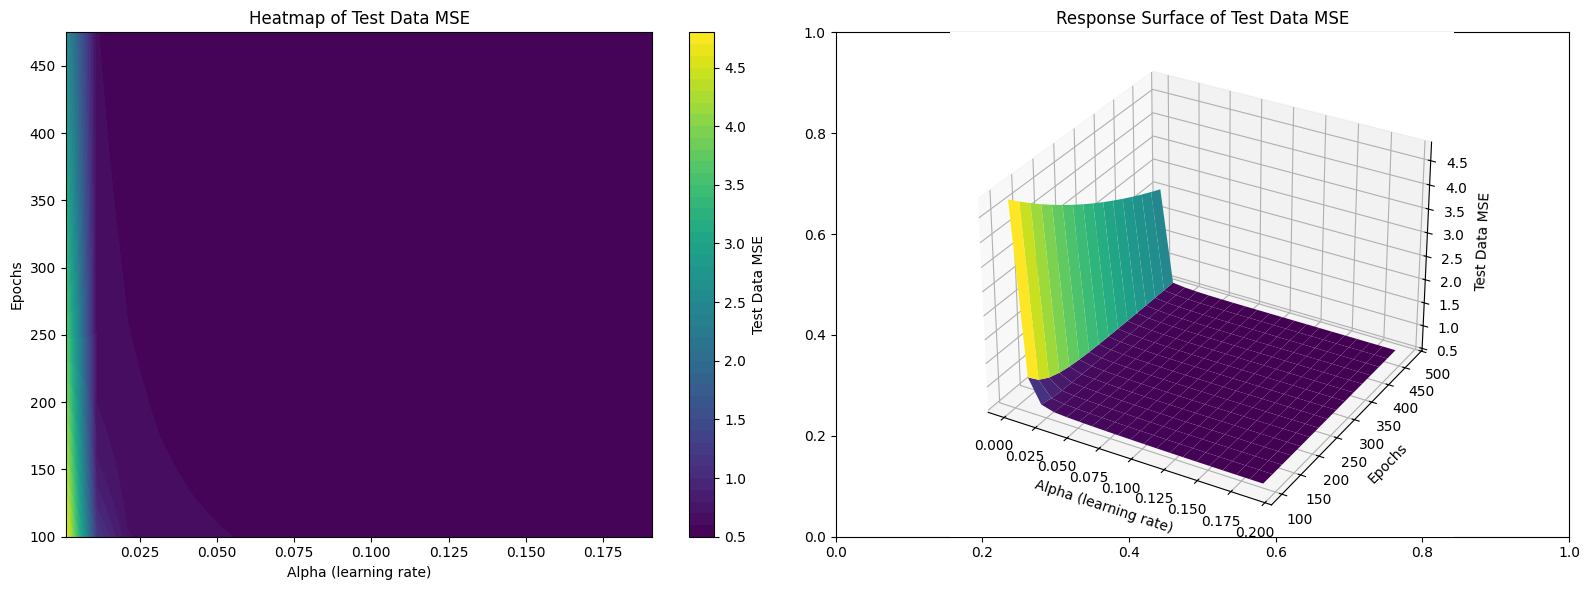

In [14]:
X_train = np.hstack([np.ones((x_train_Standard.shape[0], 1)), x_train_Standard])
X_test  = np.hstack([np.ones((x_test_Standard.shape[0], 1)),  x_test_Standard])

# Ranges for alpha and epochs
alpha_vals = np.arange(0.001, 0.2, 0.01)
epoch_vals = np.arange(100, 500, 25)

# Matrix to store MSE results
MSE_test_surface = np.zeros((len(epoch_vals), len(alpha_vals)))

for i, epochs in enumerate(epoch_vals):
    for j, alpha in enumerate(alpha_vals):
        w = np.zeros((X_train.shape[1], 1))
        for _ in range(epochs):
            error = h_w(X_train, w) - y_train
            grad  = (X_train.T.dot(error)) / len(y_train)
            w -= alpha * grad
        # Evaluate on test set
        y_pred_test = h_w(X_test, w)
        mse_test = mean_squared_error(y_test, y_pred_test)
        MSE_test_surface[i,j] = mse_test

# two plots will apear next to eachother
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection': None})

# define two independant axis
A, B = np.meshgrid(alpha_vals, epoch_vals)

# 1.Contour
cp = ax1.contourf(A, B, MSE_test_surface, levels=50, cmap="viridis") # color spectrum
fig.colorbar(cp, ax=ax1, label="Test Data MSE")
ax1.set_xlabel("Alpha (learning rate)")
ax1.set_ylabel("Epochs")
ax1.set_title("Heatmap of Test Data MSE")

# 2.Response Surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(A, B, MSE_test_surface, cmap="viridis", edgecolor="none")
ax2.set_xlabel("Alpha (learning rate)")
ax2.set_ylabel("Epochs")
ax2.set_zlabel("Test Data MSE")
ax2.set_title("Response Surface of Test Data MSE")

plt.tight_layout()
plt.show()

**Comparison of mean-squared errors for the 4 developed models**

Models sorted by MSE (smallest to largest):

BGD (Standard): 0.544061
LinearReg (MinMax): 0.544484
LinearReg (Standard): 0.544484
BGD (MinMax): 0.808578


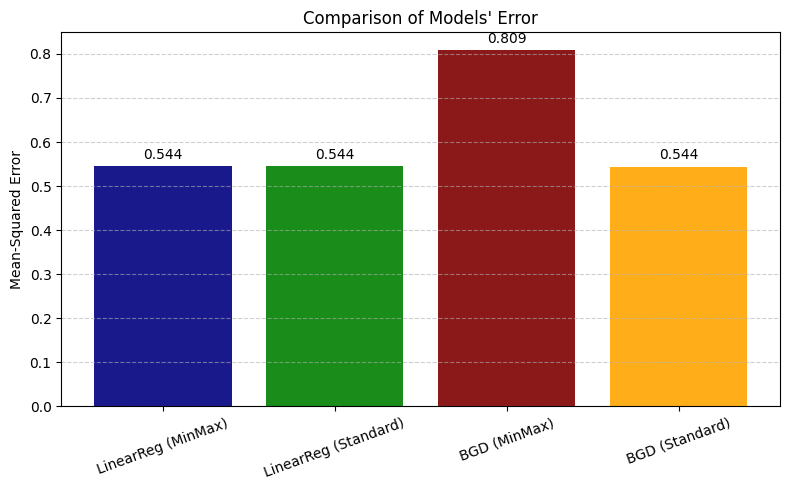

In [15]:
mse_val = [mse1, mse2, mse3, mse4]
models = [
    "LinearReg (MinMax)",
    "LinearReg (Standard)",
    "BGD (MinMax)",
    "BGD (Standard)"]


# Sort the models based on the magnitude of their error
paired = list(zip(models, mse_val)) # pair models name with their MSE values
paired_sorted = sorted(paired, key=lambda x: x[1]) # sort based on MSE values
print("Models sorted by MSE (smallest to largest):\n") # Print only model names in order of their MSE

for model, mse in paired_sorted:
    print(f"{model}: {mse:.6f}")


# Bar plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, mse_val, color=["navy","green","maroon","orange"], alpha=0.9)

# Adding labels on top of them
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.3f}",
             ha='center', va='bottom', fontsize=10)

plt.ylabel("Mean-Squared Error")
plt.title("Comparison of Models' Error")
plt.xticks(rotation=20)
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Based on the results, the **Batch Gradient Descent (BGD) model with standard scaler preprocessing** gave the best performance in terms of MSE. We also saw that for Linear Regression, the choice of preprocessing (MinMax or Standard) did not really make a big difference. But for BGD, the type of preprocessing mattered a lot, which shows how important proper data preprocessing is.

Another key point is that without tuning the hyperparameters (like **alpha = 0.1** and **epochs = 400**), BGD (with standard scaler preprocessing) would actually perform worse than Linear Regression. This means that with the right tuning, BGD can reach accuracy similar to Linear Regression while keeping computational costs lower.

# Part 2:(Optinal) Apply the Mini-batch GD and tune the k

In [24]:
n_samples = len(x_train_Standard)
k = 32 # mini-batch size
epochs = 400
alpha = 0.001 # learning rate
bn_max = int(n_samples/k) # mini-batch numbers

# Step 1: shuffle indices
rng = np.random.default_rng(42)      # fixed seed for shuffling
idx = rng.permutation(n_samples)

# Step 2: apply permutation to both X and y
x_shuffled = x_train_Standard[idx]
y_shuffled = y_train[idx]

# Step 3: split into batches (features + targets)
x_batches = [x_shuffled[i:i+k] for i in range(0, n_samples, k)]
y_batches = [y_shuffled[i:i+k] for i in range(0, n_samples, k)]

w = np.zeros((x_train.shape[1]+1, 1))

for j in range(epochs):
  for bn in range(0,bn_max):
    X = np.hstack([np.ones((x_batches[bn].shape[0], 1)), x_batches[bn]])
    error = h_w(X,w) - y_batches[bn]
    grad = (X.T.dot(error)) / len(y_batches[bn])
    w -= alpha * grad

print(w.T)
y_pred_MBGD = h_w(np.hstack([np.ones((x_test_Standard.shape[0], 1)), x_test_Standard]), w) # bias term
mse_MBGD = mean_squared_error(y_test, y_pred_MBGD)
print("\nMean Squared Error:\n",mse_MBGD)

[[ 2.06438319e+00  8.15847748e-01  1.15894096e-01 -2.59360335e-01
   2.98964477e-01 -1.72308334e-03 -3.48144043e-02 -9.19317528e-01
  -8.84823705e-01]]

Mean Squared Error:
 0.5454804370455427


**effect of mini-batch size on the mean-squared error of the test data**

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_regression.py:570: RuntimeWarning: overflow encountered in square
  output_errors = _average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


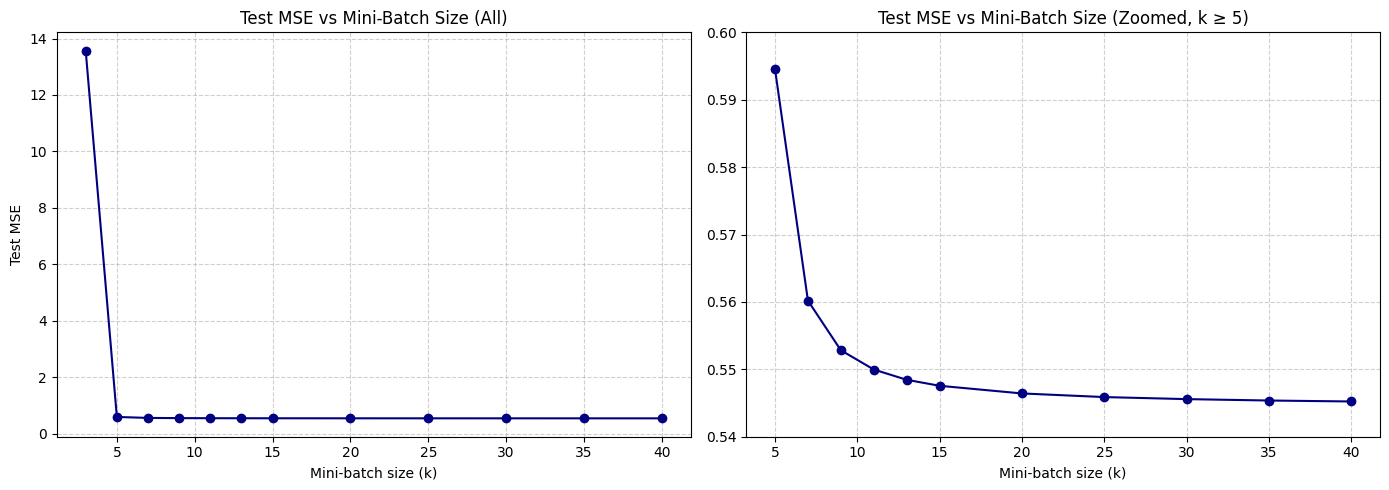

In [37]:
# defining the "mini-batch gradient descend mean-squared error" (mbgd_mse) function
def mbgd_mse(x_train_Standard, y_train, x_test_Standard, y_test, k, epochs=400, alpha=0.001, seed=42):
    n_samples = len(x_train_Standard)
    rng = np.random.default_rng(seed)
    idx = rng.permutation(n_samples)
    x_shuffled = x_train_Standard[idx]
    y_shuffled = y_train[idx]

    x_batches = [x_shuffled[i:i+k] for i in range(0, n_samples, k)]
    y_batches = [y_shuffled[i:i+k] for i in range(0, n_samples, k)]

    w = np.zeros((x_train_Standard.shape[1] + 1, 1))

    for _ in range(epochs):
        for bn in range(len(x_batches)):
            X = np.hstack([np.ones((x_batches[bn].shape[0], 1)), x_batches[bn]])
            error = h_w(X, w) - y_batches[bn]
            grad = (X.T.dot(error)) / len(y_batches[bn])
            w -= alpha * grad

    X_test = np.hstack([np.ones((x_test_Standard.shape[0], 1)), x_test_Standard])
    y_pred = h_w(X_test, w)
    return mean_squared_error(y_test.ravel(), y_pred.ravel())

# k from 1 to 40
k_values = [1,3,5,7,9,11,13,15,20,25,30,35,40]
mse_values = [mbgd_mse(x_train_Standard, y_train, x_test_Standard, y_test, k) for k in k_values]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,5))  # no sharey

# Left: full k range
axes[0].plot(k_values, mse_values, marker='o', color="navy")
axes[0].set_xlabel("Mini-batch size (k)")
axes[0].set_ylabel("Test MSE")
axes[0].set_title("Test MSE vs Mini-Batch Size (All)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# Right: zoomed (skipped k=1,3)
axes[1].plot(k_values[2:], mse_values[2:], marker='o', color="navy")
axes[1].set_xlabel("Mini-batch size (k)")
axes[1].set_title("Test MSE vs Mini-Batch Size (Zoomed, k ≥ {})".format(k_values[2]))
axes[1].set_ylim(0.54, 0.6)   # <-- zoom y-axis
axes[1].grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

When using **Mini-Batch Gradient Descent (MBGD)**, we observed that a relatively large learning rate such as **alpha = 0.1** causes the weights to diverge rather than converge, highlighting the importance of careful learning rate selection. Setting **k = 1** corresponds to **Stochastic Gradient Descent (SGD)**, leads to unstable training and poor convergence on this dataset, producing an **infinite MSE**. Even with a slightly larger batch size such as k = 3, the MSE remains as high as 13.6, which is far from the converged value of approximately 0.545. This demonstrates that very small batch sizes are ineffective here and that larger k values are necessary for stable and accurate convergence. As the mini-batch size **k** increases, the algorithm moves closer to **Batch Gradient Descent (BGD)**. In this regime, the error decreases and the results become more stable, though at the cost of slower learning speed. This trade-off illustrates why an intermediate batch size is often preferred: it balances convergence stability with computational efficiency.